In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix
import warnings 
warnings.filterwarnings('ignore')

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/customer-segmentation-dataset/Online Retail.xlsx


In [2]:
df = pd.read_excel('/kaggle/input/customer-segmentation-dataset/Online Retail.xlsx')

In [3]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [5]:
def print_percent_null(data):
    null_data = data.isna().sum() / len(data)
    return null_data.apply(lambda x: f"{x:.1%}")

print_percent_null(df)

InvoiceNo       0.0%
StockCode       0.0%
Description     0.3%
Quantity        0.0%
InvoiceDate     0.0%
UnitPrice       0.0%
CustomerID     24.9%
Country         0.0%
dtype: object

In [6]:
df.dropna(inplace=True)

In [7]:
print_percent_null(df)

InvoiceNo      0.0%
StockCode      0.0%
Description    0.0%
Quantity       0.0%
InvoiceDate    0.0%
UnitPrice      0.0%
CustomerID     0.0%
Country        0.0%
dtype: object

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      406829 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.9+ MB


In [9]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [10]:
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']


new_df = df.groupby('CustomerID').agg({'InvoiceDate': lambda x: (df['InvoiceDate'].max() - x.max()).days,
                                            'InvoiceNo': 'count',
                                            'TotalPrice': 'sum'})


new_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4372 entries, 12346.0 to 18287.0
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   InvoiceDate  4372 non-null   int64  
 1   InvoiceNo    4372 non-null   int64  
 2   TotalPrice   4372 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 136.6 KB


In [11]:
new_df.head()

,InvoiceDate,InvoiceNo,TotalPrice
CustomerID,,,
12346.0,325,2,0.00
12347.0,1,182,4310.00
12348.0,74,31,1797.24
12349.0,18,73,1757.55
12350.0,309,17,334.40


In [12]:
scaler = MinMaxScaler()
normalize_df = scaler.fit_transform(new_df)

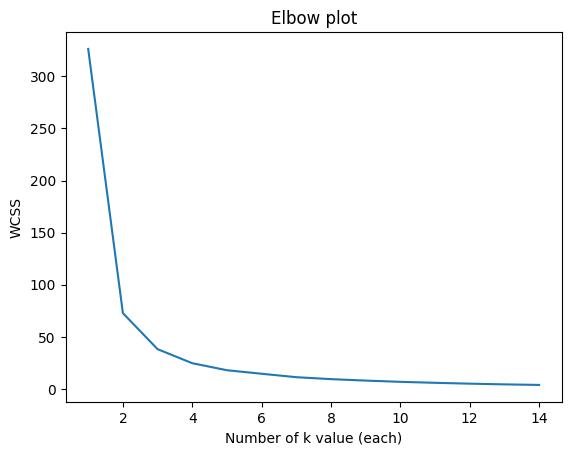

In [13]:
wcss = []

for each in range(1, 15):
    kmeans = KMeans(n_clusters=each)
    kmeans.fit(normalize_df)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 15), wcss)
plt.title('Elbow plot')
plt.xlabel("Number of k value (each)")
plt.ylabel("WCSS")
plt.show()

In [14]:
kmeans1 = KMeans(n_clusters=3)
cluster_k = kmeans1.fit_predict(normalize_df)

In [15]:
with_km_df = pd.DataFrame(normalize_df, columns=new_df.columns, index=new_df.index)
with_km_df['cluster'] = cluster_k
with_km_df.head()

,InvoiceDate,InvoiceNo,TotalPrice,cluster
CustomerID,,,,
12346.0,0.871314,0.000125,0.015109,0
12347.0,0.002681,0.022676,0.030297,1
12348.0,0.198391,0.003758,0.021442,1
12349.0,0.048257,0.009020,0.021303,1
12350.0,0.828418,0.002005,0.016288,0


In [16]:
with_km_df['cluster'].value_counts(ascending=True)

cluster
0     634
2     816
1    2922
Name: count, dtype: int64

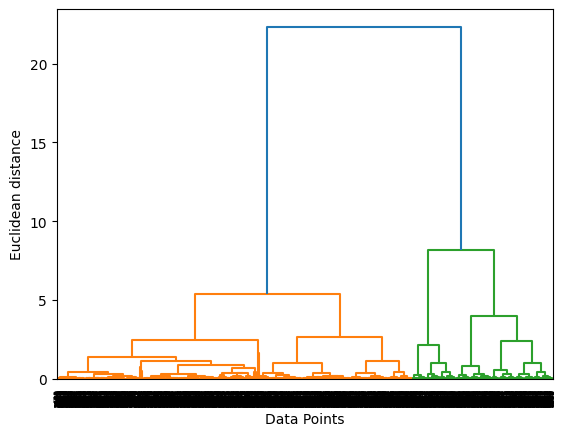

In [17]:
merging = linkage(normalize_df, method='ward')
dendrogram(merging, leaf_rotation=90)
plt.xlabel('Data Points')
plt.ylabel('Euclidean distance')
plt.show()

In [18]:
hc = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='ward')
cluster_hc = hc.fit_predict(normalize_df)

In [19]:
with_hc_df = pd.DataFrame(normalize_df, columns=new_df.columns, index=new_df.index)
with_hc_df['cluster'] = cluster_hc
with_hc_df.head()

,InvoiceDate,InvoiceNo,TotalPrice,cluster
CustomerID,,,,
12346.0,0.871314,0.000125,0.015109,2
12347.0,0.002681,0.022676,0.030297,0
12348.0,0.198391,0.003758,0.021442,0
12349.0,0.048257,0.009020,0.021303,0
12350.0,0.828418,0.002005,0.016288,2


In [20]:
with_hc_df['cluster'].value_counts(ascending=True)

cluster
2     391
1     850
0    3131
Name: count, dtype: int64

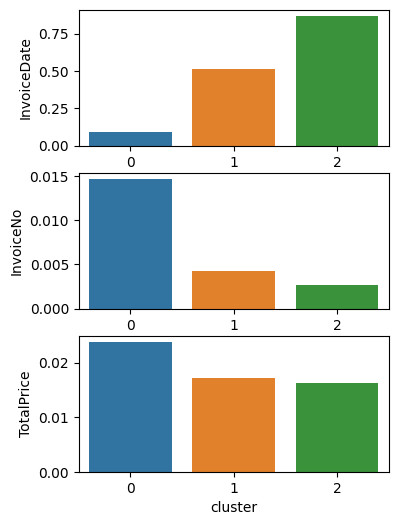

In [21]:
cluster_mean = with_hc_df.groupby('cluster')[['InvoiceDate', 'InvoiceNo', 'TotalPrice']].mean().reset_index()

fig, axes = plt.subplots(nrows=3, figsize=(4, 6))

sns.barplot(cluster_mean, x='cluster', y='InvoiceDate', ax=axes[0])
sns.barplot(cluster_mean, x='cluster', y='InvoiceNo', ax=axes[1])
sns.barplot(cluster_mean, x='cluster', y='TotalPrice', ax=axes[2])

plt.show()

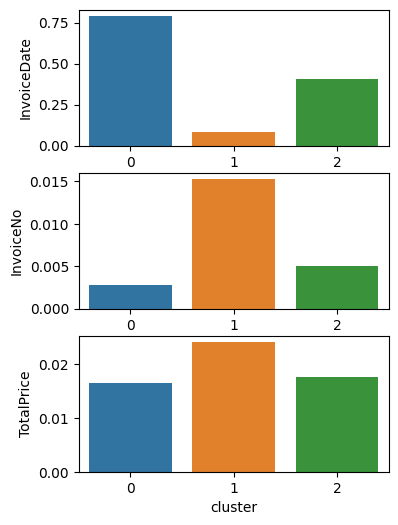

In [22]:
cluster_mean = with_km_df.groupby('cluster')[['InvoiceDate', 'InvoiceNo', 'TotalPrice']].mean().reset_index()

fig, axes = plt.subplots(nrows=3, figsize=(4, 6))

sns.barplot(cluster_mean, x='cluster', y='InvoiceDate', ax=axes[0])
sns.barplot(cluster_mean, x='cluster', y='InvoiceNo', ax=axes[1])
sns.barplot(cluster_mean, x='cluster', y='TotalPrice', ax=axes[2])

plt.show()